In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint, solve_ivp

In [2]:
def Model(V,r,U):
    K = -0.1;
    m = 1e4;
    Vt = 0.0;
    a = 0.1;
    # ===============================
    Γtt_t = 0  # (1)
    Γtr_t = (m * r * (r**5 + 2 * m * r**4 - 2 * m * a**2 * r**2 ))\
    /(r**4 * (r**4 - 4 * m**2 * r**2 + 4 * a**2 * m**2 )); # (2)
    Γtϕ_t = 0; # (3)
    Γtz_t = 0;  # (4)
    # ================================
    Γrt_t = ((m * r**3) * (r**3 + 2 * r**2 * m - 2 * m * a**2) )\
    /(r**4 * (r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2)); # (5)
    Γrr_t = 0;  # (6)
    Γrϕ_t = -(m * a * r * (3 * r + 4 * m))\
    /(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2);   # (7)
    Γrz_t = 0 ; # (8)
    # =================================
    Γϕt_t = 0; # (9)
    Γϕr_t = -(m * a * r * (3 * r + 4 * m))\
    /(r**4 - 4 * r**2 * m**2 + 4 * a**2 + m**2 );  # (10)
    Γϕϕ_t = 0;  # (11)
    Γϕz_t = 0;  # (12)
    # ==================================
    Γzt_t = 0;  # (13)
    Γzr_t = 0;  # (14)
    Γzϕ_t = 0;  # (15)
    Γzz_t = 0;  # (16)
    # ==================================
    Γtt_r = (m)/(r * (r**2 + 2*m));  # (17)
    Γtr_r = 0;  # (18)
    Γtϕ_r = - (m * a)/(r * (r + 2 * m));  # (19)
    Γtz_r = 0;  # (20)
    # =================================
    Γrt_r = 0;  # (21)
    Γrr_r = - (m)/(r * (r + 2 * m));  # (22)
    Γrϕ_r = 0;   # (23)
    Γrz_r = 0;  # (24)
    # =================================
    Γϕt_r = -(m * a)/(r * (r + 2 * m));  # (25)
    Γϕr_r = 0;  # (26)
    Γϕϕ_r = -(r * (r + m))/(r + 2 * m); # (27)
    Γϕz_r = 0; # (28)
    # ================================
    Γzt_r = 0; # (29)
    Γzr_r = 0; # (30)
    Γzϕ_r = 0; # (31)
    Γzz_r = (m)/(r * (r + 2 * m)); # (32)
    # =================================
    Γtt_ϕ = 0; # (33)
    Γtr_ϕ = (a * m)/(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2); # (34)
    Γtϕ_ϕ = 0; # (35)
    Γtz_ϕ = 0; # (36)
    # ==================================
    Γrt_ϕ = (a * m)/(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2); # (37)
    Γrr_ϕ = 0; # (38)
    Γrϕ_ϕ = -(r**3 * m - r**4 + 2 * r**2 * m**2 + 2 * a**2 * m**2)\
    /(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2); # (39)
    Γrz_ϕ = 0; # (40)
    # ==================================
    Γϕt_ϕ = 0;  # (41)
    Γϕr_ϕ = -(r**3 * m - r**4 + 2 * r**2 * m**2 + 2 * a**2 * m**2)\
    /(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2);  # (42)
    Γϕϕ_ϕ = 0;  # (43)
    Γϕz_ϕ = 0;  # (44)
    # ==================================
    Γzt_ϕ = 0;  # (45)
    Γzr_ϕ = 0;  # (46)
    Γzϕ_ϕ = 0;  # (47)
    Γzz_ϕ = 0;  # (48)
    # ================================
    Γtt_z = 0;  # (49)
    Γtr_z = 0;  # (50)
    Γtϕ_z = 0;  # (51)
    Γtz_z = 0;  # (52)
    # ====================================
    Γrt_z = 0;  # (53)
    Γrr_z = 0;  # (54)
    Γrϕ_z = 0;  # (55)
    Γrz_z = -(m)/(r * (r + 2 * m));  # (56)
    # =================================
    Γϕt_z = 0;  # (57)
    Γϕr_z = 0;  # (58)
    Γϕϕ_z = 0;  # (59)
    Γϕz_z = 0;  # (60)
    # ====================================
    Γzt_z = 0;  # (61)
    Γzr_z = -(m)/(r * (r + 2 * m));  # (62)
    Γzϕ_z = 0;  # (63)
    Γzz_z = 0;  # (64)
    # ====================================
    # initial state 
    Vr = V[0]
    Vϕ = V[1]
    Bϕ = V[2]
    U0 = U
    Ur = U0*Vr
    
    
    
    # Vϕ Conputation
    dVϕdr = (-1.0/Vr)*((2*Vr*(Γtr_ϕ - Γtr_t*Vϕ))+\
#                           V[0]*V[2]*(Γrt_ϕ - Γrt_t*V[1]) +\
                          Vr*Vϕ*(Γϕr_ϕ - Γϕr_t*Vϕ)+\
                          Vr*Vϕ*(Γϕr_ϕ - Γϕr_t*Vϕ)+\
                          Vr*Vϕ*(Γrϕ_ϕ - Γrϕ_t*Vϕ))
    
    
    L1 = Γtt_r - 2 * Γtr_t * Vr*Vr + 2 * Vϕ * Γtϕ_r + \
    Vt*Vr*(Γrt_t - Γrt_t * Vr) + \
    (Vr * Vr * Γrr_r) - (Γϕr_t * Vr * Vr * Vϕ) - \
    (Γrϕ_t * Vr * Vr * Vϕ) + (Γϕϕ_r * Vϕ * Vϕ)
    
    L2 = Vr * (Γrr_r + Γϕr_ϕ + Γzr_z - Γrt_t) + \
    Vr * (Γrz_r + Γϕz_ϕ + Γzz_z - Γzt_t) - \
    Vr * Vϕ * (Γrϕ_t + Γϕr_t)
    
    dBϕdr = ( 1/(Bϕ*(1+2*Ur*U0))) * ((r**1.5 + K*r**2.5) * U0**2 * (L1) - \
            ((r**1.5 + r**2.5)**2) * U0**2 * (1/4*r) * (L2)* Vr + \
            2.5 * r**1.5 * (1 + 2*m/r))  - \
            Bϕ * (1/r + 1/r**2)
    
    Jz = -Bϕ * (1/r + 1/r**2) - dBϕdr
    
    
        
    dVrdr = -(Vr*(Γrr_r + Γϕr_ϕ + Γzr_z - Γrt_t +Γrz_r + Γϕz_ϕ + Γzz_z - Γzt_t) - \
               Vr*Vϕ*(Γrϕ_t + Γϕr_t)) -\
    Vr*((1.5 * r**0.5 - 2.5 * K * r**1.5)/(r**1.5 + K * r**2.5))
    
    
    dVdr = [dVrdr, dVϕdr, dBϕdr]
    return dVdr 

In [3]:
Vr0 = 0.12;
Vϕ0 = 0.918;
Bϕ0 = 1e4;
V0 = [Vr0, Vϕ0, Bϕ0]
# number of time points
n = 60
# time points
# t = np.linspace(10,100,n)
t = np.arange(10,100)

# store solution
Vr = np.empty_like(t)
Vϕ = np.empty_like(t)
Bϕ = np.empty_like(t)
U = np.empty_like(t)

Vr[0] = V0[0]
Vϕ[0] = V0[1]
Bϕ[0] = V0[2]
U[0] = 1/(np.sqrt(1 - (Vr[0]**2 + Vϕ[0]**2))) 

In [20]:
a = np.zeros((3,2))
# a[0][0] = 1
# a[1][1] = 2
a.shape

(3, 2)

In [8]:
for s in range(1,n):
    # span for next time step
    tspan = [t[s-1],t[s]]
    # solve for next step
    V = odeint(Model,V0,tspan,args=(U[s-1],))
    # store solution for plotting
    Vr[s] = V[1][0]
    Vϕ[s] = V[1][1]
    Bϕ[s] = V[1][2]
    # next initial condition
    V0 = V[1]
    U[s] = Vr[s]
#     U[s] = 1/(np.sqrt(1 - (Vr[s]**2 + Vϕ[s]**2)))     

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1000000000000D+02   r2 =  0.5340843854985D-27
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1000000000000D+02   r2 =  0.3666902884628D-27
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1000000000000D+02   r2 =  0.7333805769255D-27
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1000000000000D+02   r2 =  0.7333805769255D-27
 lsoda--  warning..internal t (=r1) 

OverflowError: Python int too large to convert to C long

In [9]:
Vr

array([                  0, 2724351969108088832, 2772903961142721536,
       7914600242062776320,                 168,                   0,
                         0,                   0,                   0,
          9007405420642390,   12948055089217597,    2815003173453873,
          9007405477462102,   12948055089217597,   16607264147308601,
         13515012249354250,   13792411301773344,    2815003173584997,
         17170111021449302,   32088516718166048,   24206985438953520,
          9007388236448725,   26177379056812098,   30962384879419402,
         28429393561714805,   28710924367954034,   30681223440629792,
         31244203453317221,   32370120545140841,   17170111025512458,
          2814955929075744,   29555370772922403,   31525334837166189,
         32651569751720047,    9007697471602803,   31525669840093245,
         30962698416816174,   27866439313522803,   13511009338130533,
         13511005043753004,    2814925867974700,   32369759762972682,
         28429462281

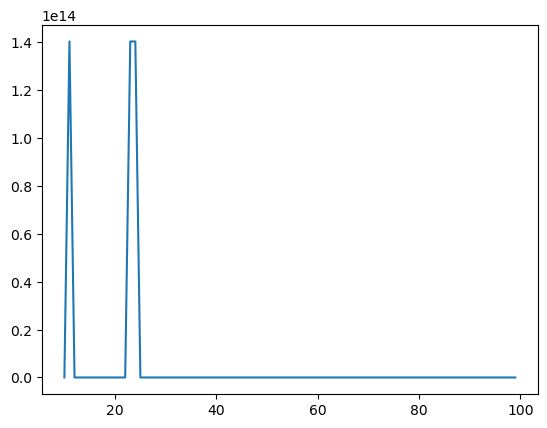

In [6]:
plt.plot(t,Vr)
plt.show()

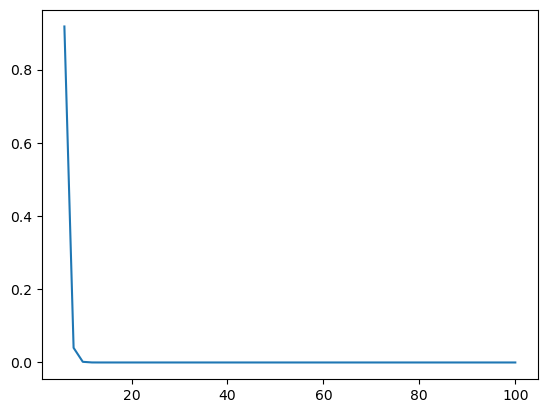

In [6]:
plt.plot(t,Vϕ)
plt.show()

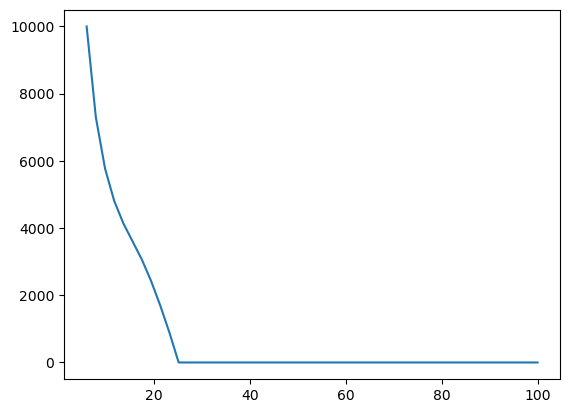

In [7]:
plt.plot(t,Bϕ)
plt.show()
# Vr.shape